In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import io
import os
import re

In [109]:
# relevant_path = %pwd
# included_extensions=['.mat']
# included_structs = ['CI_table', 'corrtable']
# file_names = [fn for fn in os.listdir(relevant_path)
#               if any(fn.endswith(ext) for ext in included_extensions)]
# file_names = ['recovery_results_2states_4params_nrits1000.mat', 
#              'recovery_results_3states_4params_nrits1000.mat', 
#              'recovery_results_4states_4params_nrits1000.mat', 
#              'recovery_results_5states_4params_nrits1000.mat']



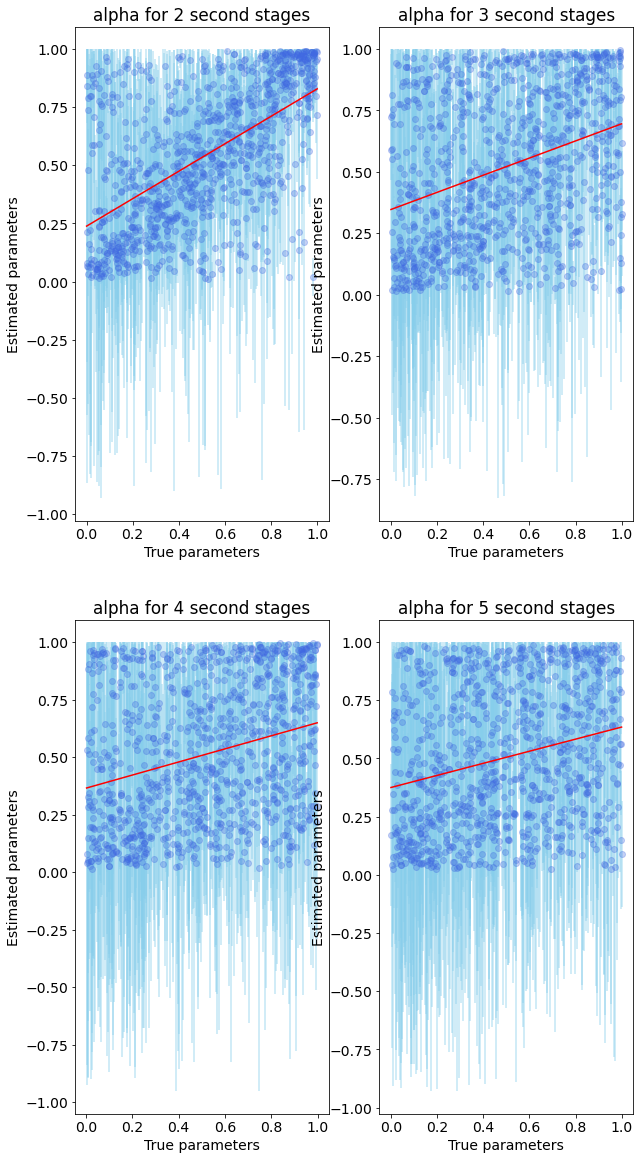

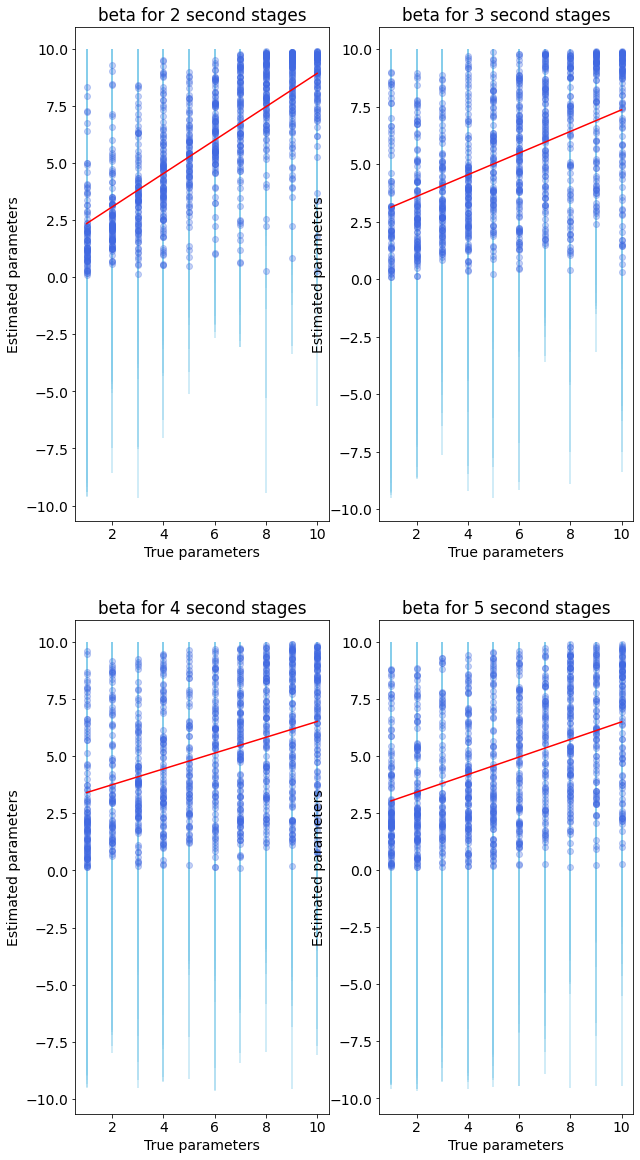

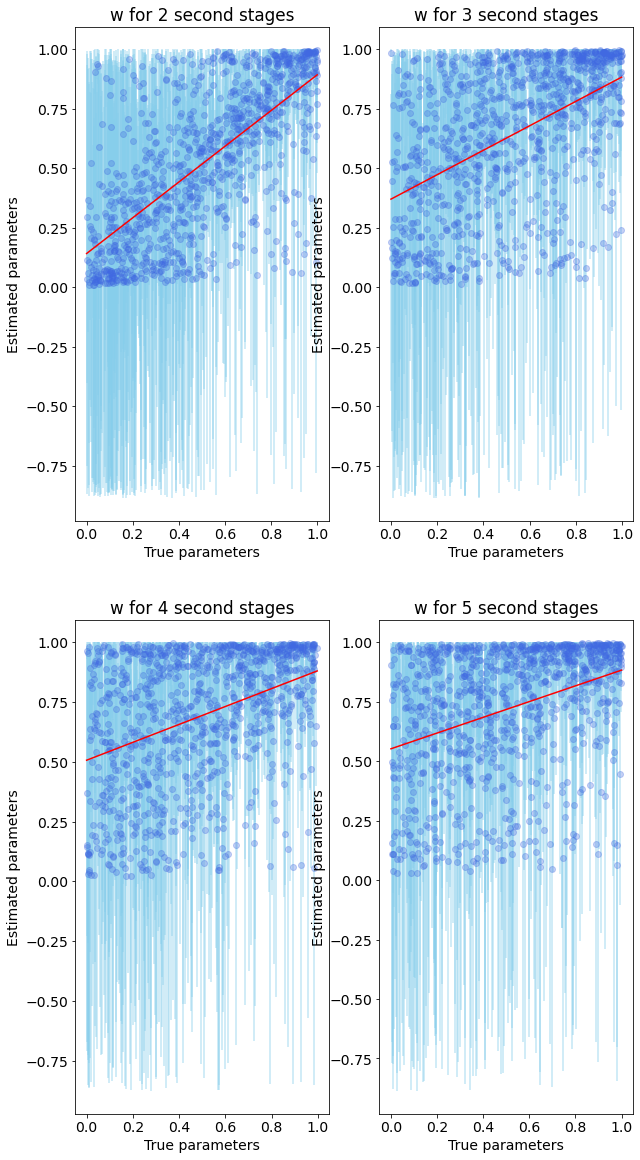

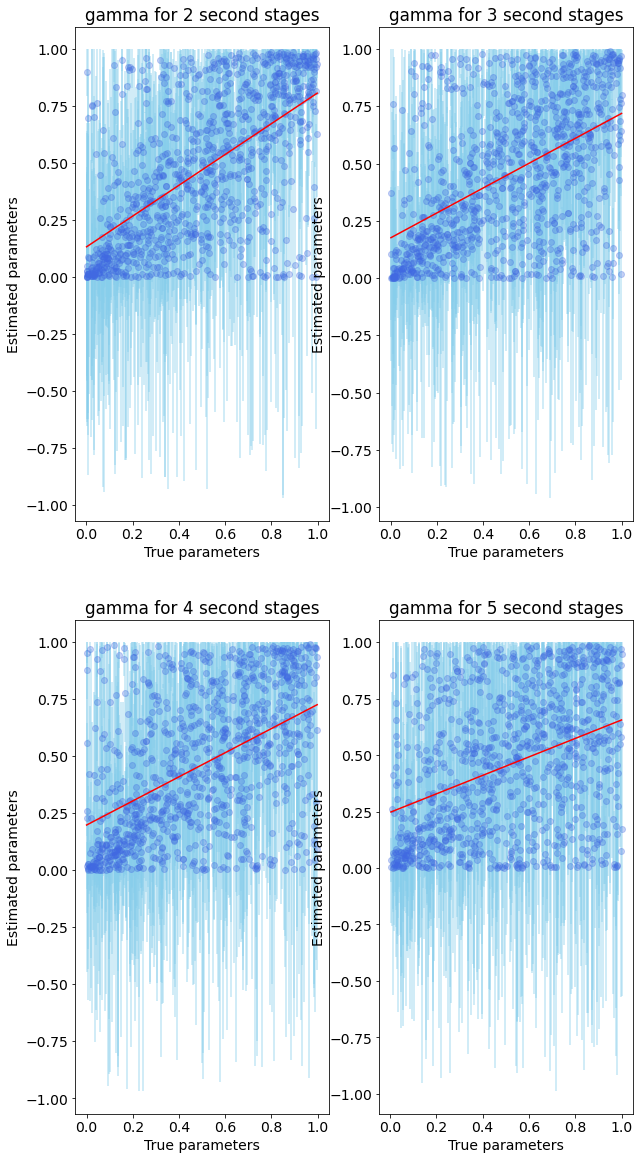

In [143]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']

for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
#     for second_stage in second_stages:
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_results_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})
#         fig = plt.figure()
#         ax = fig.add_axes([.1, .1, 1, 1])

        
    
    
        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')
        # ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
        # ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

        # ax.errorbar(x,y,yerr=[y-ci_lower, ci_upper-y],linestyle='',color='skyblue', alpha=.3)
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')


# plt.subplots_adjust(wspace=1, hspace=2)